In [30]:
import cvxpy as cp
import numpy as np

m = 30
n = 20
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

x_o = np.random.randn(n)

# Construct the problem.
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
constraints = [cp.norm2(x - x_o) <= 1]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print('solution: ', x.value)

solution:  [-0.99844855  0.64386157 -0.22382624 -0.10671875 -0.26977205  0.3090943
 -0.3509508   0.27871048 -0.64727089 -0.43064547  0.90069811  0.68885167
 -0.80599671  0.67690318 -0.7104346   0.73527607 -1.34074066 -0.99695317
 -0.41591103 -0.14583645]


/home/lizri/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


Stockage in Bytes

FJLT:  2460800 Bytes
CBSCFD:  2688800 Bytes
FJLT > CBSCFD:  False


In [31]:
np.linalg.norm(x.value - x_o, 2)

1.0000001201375888

In [32]:
print(f'MSE with constraint: {(1/m) * np.linalg.norm((A @ x.value) - b, 2)}')

MSE with constraint: 0.5202306926020343


In [33]:
x_hat = np.linalg.inv((A.T @ A)) @ A.T @ b
print(f'MSE wo constraint: {(1/m) * np.linalg.norm((A @ x_hat) - b, 2)}')


MSE wo constraint: 0.12583072466261866


In [39]:
import numpy as np
from scipy.linalg import block_diag


I = np.identity(3)
x = np.random.randn(4)
block_diag(I, np.diag(x))


array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.45611756,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.97989025,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.69257435,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.47867236]])

In [49]:
import numpy as np;
import scipy.linalg
a = np.random.randn(4)
A = np.outer(a,a)
np.linalg.pinv(A)


array([[ 1.64837996e-01, -4.25446432e-03, -3.12776308e-02,
         7.39918377e-02],
       [-4.25446432e-03,  1.09807612e-04,  8.07274824e-04,
        -1.90972737e-03],
       [-3.12776308e-02,  8.07274824e-04,  5.93485854e-03,
        -1.40397811e-02],
       [ 7.39918377e-02, -1.90972737e-03, -1.40397811e-02,
         3.32131679e-02]])

In [50]:
import numpy as np;
import scipy.linalg
import time

dim = 100
m = 50



t1, t2, t3 = [], [], []
for _ in range(1000):
    H = np.random.randn(m, m)

    b = np.random.randn(dim)
    Z = np.random.randn(m,dim)

    t0 =  time.process_time() 
    p = H @ Z @ b
    t1.append(time.process_time() - t0)


    t0 =  time.process_time() 
    k = (b @ b) - (b.T @ Z.T @ p)
    t2.append(time.process_time() - t0 )


    t0 =  time.process_time() 
    row = - p.T /k 
    H = np.append(H, row.reshape(1, len(row)), axis=0)
    column = np.append(- p/k, 1/k)
    H = np.append(H, column.reshape(len(column), 1), axis=1)
    t3.append(time.process_time() - t0)

print(np.mean(t1), np.mean(t2), np.mean(t3)) 


1.657428799999794e-05 5.696233999997968e-06 1.547840100000375e-05


In [51]:
t0 =  time.time() 
Z = np.random.randn(2*m,dim)
np.linalg.svd(Z)
time.time() - t0

0.027533769607543945

In [104]:

np.log10((0.0004759392400882003+0.0034158083111105932))

-2.409855339184057

In [105]:
np.log10((0.0014079372666666351+0.03474162474999787))

-1.4418969601923568

In [239]:
action_set = np.random.randn(1000, 100)
theta_est = np.random.randn(100)
Vinv = np.outer(b, b) + ((1/.5)* np.identity(100))

In [240]:
t0 = time.process_time()
i = 0
ucb_max = float('-inf')
for idx, a in enumerate(action_set):
    ucb = (a @ theta_est) + ( np.sqrt(a @ (Vinv @ a)))
    if ucb > ucb_max:
        ucb_max = ucb
        a_max = a
        i = idx
time.process_time() - t0


0.17337459899999885

In [241]:

t0 = time.process_time()
M = (action_set @ theta_est) + np.sqrt(action_set @ Vinv @ action_set.T)
M [np.isnan(M)] = float('-inf')
j = np.where(M==np.max(M))
time.process_time() - t0


/tmp/ipykernel_403952/832206932.py:2: RuntimeWarning: invalid value encountered in sqrt
  M = (action_set @ theta_est) + np.sqrt(action_set @ Vinv @ action_set.T)


0.14810912600000847

In [242]:
i, j

(535, (array([992]), array([535])))

In [243]:
x,y = np.unravel_index(M.argmax(), M.shape)
x,y

(992, 535)

In [32]:
import numpy as np
eps = 1
for k in [5, 10, 20, 30, 40, 50, 80, 90, 100]:
    c = k /( (eps**-2) * np.log10(100))
    print(c)

2.5
5.0
10.0
15.0
20.0
25.0
40.0
45.0
50.0


In [3]:
(eps**-2) * np.log10(1000) *33.33

99.99

In [4]:
import math
c_s = [1.66,
3.33,
6.66,
10.0,
13.33,
16.66,
26.66,
30.0,
33.33]
for c in c_s:
    print(math.ceil(c* (eps**-2)*np.log10(1000)))

5
10
20
30
40
50
80
90
100


In [7]:
dim={'k':1, 'b':3}
list(dim.keys())[0]

'k'

In [3]:
import numpy as np
t = np.array([1,2,3])


In [7]:
t.reshape(1, t.shape[0])

array([[1, 2, 3]])

In [8]:
import time
import numpy as np

In [17]:
theta_est = np.random.randn(dim)

In [53]:
dim = 100
m = 50
actions = 1000
action_set = np.random.randn(actions, dim)

a = action_set[0]

lam = 0.1

S = np.zeros((m, dim))
a


array([-1.01672537e+00,  9.28109996e-01, -1.24380326e+00,  1.19664029e+00,
       -6.34216633e-01,  8.03981296e-01,  3.38763749e-01,  1.14127564e-01,
       -1.04672285e+00, -1.65317555e-01,  6.17530290e-01,  3.12218839e-01,
        6.95878809e-01, -9.73541647e-01,  4.93255959e-02, -3.27753570e-01,
       -2.92159296e-01, -4.61558799e-01,  4.12339431e-01, -1.14742820e+00,
       -2.88758410e-01,  1.42365402e+00, -1.60554952e-02, -3.81482921e-01,
        5.53559450e-01,  1.09843663e-01, -4.42839887e-01, -3.56861942e-01,
        1.32992459e-01, -1.87278585e+00, -8.34376588e-02,  4.22244614e-01,
        6.06750898e-01, -4.87708034e-01, -6.65119329e-01, -6.79281759e-01,
        1.62114145e+00, -4.83358769e-01, -1.74567292e+00, -5.51502680e-01,
        6.02974096e-01, -1.65171593e-01, -2.29358880e-01, -7.68701623e-01,
       -1.31130402e+00, -6.94513882e-01, -7.64579471e-01,  1.67745141e-01,
       -1.90963197e+00,  5.90645207e-01, -1.48168346e-01, -5.30235568e-02,
       -8.48516137e-02, -

In [54]:
s = (S.T @ S) + np.outer(a, a)
rho_s, U = np.linalg.eig(s)

# Order eigen vectors and value
idx = rho_s.argsort()[::-1]   
rho_s = rho_s[idx]
U = U[:, idx]

# Keep m first eigen vectors
rho_s, U = rho_s[:m], U[:, :m]

S = np.diag(np.sqrt(rho_s - rho_s[-1])) @ U.T
H = np.diag(1/((rho_s - rho_s[-1]) + lam))
S, H

(array([[ 1.01672537e+00+0.j, -9.28109996e-01+0.j,  1.24380326e+00+0.j,
         ..., -5.20110673e-01+0.j,  5.62676034e-01+0.j,
         -4.26928895e-01+0.j],
        [-8.42769044e-09+0.j,  1.16912534e-08+0.j, -1.33490397e-08+0.j,
         ...,  2.21036094e-09+0.j, -7.73812777e-10+0.j,
         -1.39802644e-09+0.j],
        [ 1.53790103e-09+0.j, -9.78269182e-10+0.j,  9.68241842e-09+0.j,
         ...,  3.78250469e-10+0.j, -1.62548808e-10+0.j,
          3.29590253e-10+0.j],
        ...,
        [-1.28606946e-12+0.j, -4.76510768e-12+0.j, -5.38019582e-11+0.j,
         ...,  9.29255908e-11+0.j,  9.06524487e-11+0.j,
         -1.17514921e-10+0.j],
        [ 1.45004673e-12+0.j, -7.40281641e-13+0.j, -9.53928720e-12+0.j,
         ...,  3.85625309e-11+0.j,  3.44528801e-11+0.j,
         -3.38442878e-11+0.j],
        [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         ...,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
          0.00000000e+00+0.j]]),
 array([[ 0.01172326+0.j,  0.  

In [55]:
Vinv = (1/lam) * (np.identity(dim) - (S.T @ H @ S))

In [56]:
t = []
for _ in range(100):
    t0 = time.process_time()
    ucb_max = float('-inf')
    a_max = action_set[0]
    selected_action_idx = 0
    for idx, a in enumerate(action_set):
        ucb = (a @ theta_est) + (np.sqrt(a @ (Vinv @ a)))
        if ucb > ucb_max:
            ucb_max = ucb
            a_max = a
            selected_action_idx = idx
    t.append(time.process_time() - t0)
    

print(np.mean(t), selected_action_idx)

0.2267172035799973 882


In [57]:
(S.T @ (H @ (S @ a))).shape

(100,)

In [59]:
t = []
for _ in range(100):
    t0 = time.process_time()
    ucb_max = float('-inf')
    a_max = action_set[0]
    selected_action_idx = 0
    for idx, a in enumerate(action_set):
        Vinv_a =  (1/lam) * (a - (S.T @ (H @ (S @ a))))
        ucb = (a @ theta_est) + (np.sqrt(a @ Vinv_a))
        if ucb > ucb_max:
            ucb_max = ucb
            a_max = a
            selected_action_idx = idx
    t.append(time.process_time() - t0)
    

print(np.mean(t), selected_action_idx)

0.4352331649799987 882


In [2]:
import numpy as np
Z = np.random.randn(3, 3)
H = np.zeros((4, 4))
print(Z, H)

[[-1.12960059 -1.81949712 -0.46646492]
 [-1.48408296  0.85466279  1.09787652]
 [-0.72358724 -0.2593099  -1.28564891]] [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [3]:
H[:3, :3] = Z
print(H)

[[-1.12960059 -1.81949712 -0.46646492  0.        ]
 [-1.48408296  0.85466279  1.09787652  0.        ]
 [-0.72358724 -0.2593099  -1.28564891  0.        ]
 [ 0.          0.          0.          0.        ]]


In [4]:
Z[0][0] = 0
H

array([[-1.12960059, -1.81949712, -0.46646492,  0.        ],
       [-1.48408296,  0.85466279,  1.09787652,  0.        ],
       [-0.72358724, -0.2593099 , -1.28564891,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [7]:
row = np.array([1, 1, 1])
column = np.array([2, 2, 2])
dim = 4
H[dim-1, :dim-1] = row
H[:dim-1, dim-1] = column
H

array([[-1.12960059, -1.81949712, -0.46646492,  2.        ],
       [-1.48408296,  0.85466279,  1.09787652,  2.        ],
       [-0.72358724, -0.2593099 , -1.28564891,  2.        ],
       [ 1.        ,  1.        ,  1.        ,  0.        ]])

In [6]:
H

array([[-1.12960059, -1.81949712, -0.46646492,  0.        ],
       [-1.48408296,  0.85466279,  1.09787652,  0.        ],
       [-0.72358724, -0.2593099 , -1.28564891,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

### SQRT INV

In [33]:
import  numpy as np
dim = 4
a = np.random.randn(dim)
b = np.random.randn(dim)
c = np.random.randn(dim)
dim = np.random.randn(dim)
e = np.random.randn(dim)
f = np.zeros(dim)
f[0] = 1

X = []
# X.append(a)
# X.append(b)
# X.append(c)
# X.append(d)
# X.append(e)
# X.append(e)
X.append(f)


X = np.array(X)

In [34]:
X[:,-2] = X[:,-1]
X

array([[1., 0., 0., 0.]])

In [35]:
V = (X.T @ X) +  (np.identity(dim) * 0.1)

In [36]:
import scipy
Vinv = np.linalg.inv(V)
Vsqrt = scipy.linalg.sqrtm(V)
Vsqrtinv = scipy.linalg.sqrtm(Vinv)
Vinvsqrt = np.linalg.inv(Vsqrt)


In [38]:
np.linalg.matrix_rank(X)

1

### CHOLESKY INV

In [45]:
import  numpy as np
dim = 4
a = np.random.randn(dim)
b = np.random.randn(dim)
c = np.random.randn(dim)
dim = np.random.randn(dim)
e = np.random.randn(dim)
f = np.zeros(dim)
f[0] = 1

X = []
X.append(a)
X.append(b)
X.append(c)
X.append(dim)
X.append(e)
X.append(e)
X.append(f)


X = np.array(X)
V = (X.T @ X) +  (np.identity(dim) * 0.1)
V

array([[ 2.242549  , -1.02285981, -0.02310375, -1.26635594],
       [-1.02285981, 10.24215991,  0.98796845,  3.86249353],
       [-0.02310375,  0.98796845,  1.38511977,  1.15322212],
       [-1.26635594,  3.86249353,  1.15322212,  5.79078705]])

In [49]:
import scipy
Vinv = np.linalg.inv(V)
Vcholesky = scipy.linalg.cholesky(V)
Vcholeskyinv = scipy.linalg.cholesky(Vinv)
Vinvcholesky = np.linalg.inv(Vcholesky)

In [53]:
Vcholeskyinv, Vinvcholesky

(array([[ 0.72286394,  0.02100633, -0.1472965 ,  0.17340161],
        [ 0.        ,  0.36215645, -0.06856668, -0.22790586],
        [ 0.        ,  0.        ,  0.9302997 , -0.18526708],
        [ 0.        ,  0.        ,  0.        ,  0.41555757]]),
 array([[ 0.66777327,  0.14588212, -0.03111684,  0.23315506],
        [ 0.        ,  0.31983639, -0.0881306 , -0.14675229],
        [ 0.        ,  0.        ,  0.88142449, -0.33903696],
        [ 0.        ,  0.        ,  0.        ,  0.53760691]]))

_____

In [2]:
import numpy as np
ucb = np.random.randn(4,5)
ucb[3][2] = 10000
i,j = np.unravel_index(np.argmax(ucb, axis=None), ucb.shape)
i,j

(3, 2)

In [51]:
import  numpy as np
dim = 5
a = np.random.randn(dim)
b = np.random.randn(dim)
c = np.random.randn(dim)
d = np.random.randn(dim)
e = np.random.randn(dim)
f = np.zeros(dim)
f[0] = 1

X = []
X.append(a)
X.append(b)
X.append(c)
X.append(d)
X.append(e)
X.append(e)
X.append(c)
X.append(f)
X.append(b)



X = np.array(X)
V = (X.T @ X) +  (np.identity(dim) * 0.1)
np.linalg.matrix_rank(X), X

(5,
 array([[-0.06861522, -0.75571487, -0.30553074, -1.0689618 , -2.00524622],
        [-0.09829647,  0.86242514, -0.97251226, -0.98679123, -2.16532835],
        [-0.40701051, -1.66502748,  1.0563167 ,  0.18172999,  0.43941348],
        [-1.0865708 , -0.29887404,  0.95845903, -1.42768643, -0.15081536],
        [-0.85971286,  0.31917054,  0.84255607,  1.47318061,  0.62871546],
        [-0.85971286,  0.31917054,  0.84255607,  1.47318061,  0.62871546],
        [-0.40701051, -1.66502748,  1.0563167 ,  0.18172999,  0.43941348],
        [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [-0.09829647,  0.86242514, -0.97251226, -0.98679123, -2.16532835]]))

In [52]:
lam = 0
m = 5
# Compute SVD
U, S, Vt = np.linalg.svd(X, full_matrices=False)
# Get m-th singular value
U[:,:m-1]@ np.diag(S[:m-1]) @ Vt[:m-1, :]


array([[-0.08296412, -0.76413951, -0.32694858, -1.06822065, -1.99832097],
       [-0.11207341,  0.85433632, -0.99307637, -0.98607963, -2.15867915],
       [-0.39930432, -1.66050296,  1.06781933,  0.18133195,  0.43569422],
       [-1.16931713, -0.3474567 ,  0.83494792, -1.42341245, -0.11087927],
       [-0.91374968,  0.28744402,  0.76189814,  1.4759717 ,  0.6547954 ],
       [-0.91374968,  0.28744402,  0.76189814,  1.4759717 ,  0.6547954 ],
       [-0.39930432, -1.66050296,  1.06781933,  0.18133195,  0.43569422],
       [ 0.73741689, -0.15416981, -0.39194405,  0.01356285,  0.12673122],
       [-0.11207341,  0.85433632, -0.99307637, -0.98607963, -2.15867915]])

In [55]:
x = np.array([1, 2, 5, 0, 0])
diag = np.diag(x)
V = np.random.randn(5, 5)
diag @ V.T

array([[ 0.40515859,  0.20067001,  0.39216407, -1.14486225, -1.31727105],
       [-3.61943911,  3.00839119,  1.97782732,  1.10171802,  0.64215495],
       [ 0.3970892 , -1.39417076, -0.29723673, -3.46403177,  8.40738774],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [57]:
diag = np.diag(x[:3])
diag @ V.T[:3]

array([[ 0.40515859,  0.20067001,  0.39216407, -1.14486225, -1.31727105],
       [-3.61943911,  3.00839119,  1.97782732,  1.10171802,  0.64215495],
       [ 0.3970892 , -1.39417076, -0.29723673, -3.46403177,  8.40738774]])

In [10]:

lam = 0
# Compute SVD
U, S, Vt = np.linalg.svd(V, full_matrices=False)
# Get m-th singular value²
delta = S[m-1]**2
# Add this value to lam
lam += delta
# Compute ̂Σ = √ (Σ² - δI)
diff = np.diag(S**2) - (delta * np.identity(S.shape[0]))
diff[diff < 0] = 0
S_hat =  np.sqrt(diff)
# Compute Z and remove empty rows (0 value rows)
Z = (S_hat @ Vt)[:m-1]
# Compute H using only the m-th top singular values
l = S_hat[:m-1, :m-1]
H = np.linalg.inv(l**2 + (lam * np.identity(l.shape[0])))
print (Z)
print (H)

[[-11.97652173   8.22461582  -9.2775551   -1.22217219 -10.34822319]
 [ -2.58305939  -1.546818     2.53295819   0.47332509  -0.5666732 ]]
[[0.00241285 0.        ]
 [0.         0.04042143]]


In [34]:
seed = 48
rng = np.random.RandomState(seed)
rng.rand()

0.01749027093115263

In [26]:
for _ in range (10):
 print(rng.randn(1))

[-0.99363132]
[-1.06340081]
[-0.63807592]
[1.06158869]
[-0.15740415]
[1.09372848]
[-2.07485402]
[0.70063301]
[1.67463863]
[-0.39733411]


In [35]:
from datasets.load_data import *
finite_set = True
# Type Dataset : 'MNIST' or 'Random'
dataset = 'MNIST'
# Time limit (in sec)
time_stop = 30000
# Max iterations
n = 2000
# Number of loops (To approximate in expectation)
n_loop = 20
seeds = np.arange(n_loop)

######################## Generate theta and action set ###########################
#### Useful if dataset Random
# Dimension
dim = 2000
# Number of actions
m_actions = 100
# Noise
sigma = 0.1
theta, action_set, m_actions, dim = load_dataset(dim, m_actions, name=dataset, finite_set=finite_set)


In [54]:
a_t = np.random.randn(4)
np.outer(a_t, a_t)

array([[ 2.65455758,  0.24743812,  0.76890712, -0.1098315 ],
       [ 0.24743812,  0.02306434,  0.07167181, -0.01023768],
       [ 0.76890712,  0.07167181,  0.22271815, -0.03181329],
       [-0.1098315 , -0.01023768, -0.03181329,  0.00454424]])

In [56]:
a_t = a_t.reshape(-1, 1)

a_t @ a_t.T

array([[ 2.65455758,  0.24743812,  0.76890712, -0.1098315 ],
       [ 0.24743812,  0.02306434,  0.07167181, -0.01023768],
       [ 0.76890712,  0.07167181,  0.22271815, -0.03181329],
       [-0.1098315 , -0.01023768, -0.03181329,  0.00454424]])

In [67]:
dim = 5
S = np.random.randn(dim, dim)
a = np.random.randn(dim)
S[-1] = a
S, a

(array([[ 0.11651436,  0.97999391, -0.26550242, -0.19512796, -0.86718312],
        [-0.53229245, -1.12939644,  0.68285161,  1.38990705, -0.77862293],
        [ 0.16548949, -0.02695989,  1.65296827, -0.1572271 , -0.89784051],
        [ 0.14000427,  0.4875325 ,  0.96676173, -0.22490722,  1.36512606],
        [ 0.46433848,  0.32537148, -0.66848323,  1.42921894,  0.08091739]]),
 array([ 0.46433848,  0.32537148, -0.66848323,  1.42921894,  0.08091739]))

In [68]:
S.T @ S + np.outer(a, a)

array([[ 0.77511926,  1.08131262, -0.60631693,  0.50720305,  0.43110225],
       [ 1.08131262,  2.68607237, -1.03964778, -0.93633686,  0.7719452 ],
       [-0.60631693, -1.03964778,  5.09744986, -1.38723365, -0.5739788 ],
       [ 0.50720305, -0.93633686, -1.38723365,  6.13055367, -0.84756634],
       [ 0.43110225,  0.7719452 , -0.5739788 , -0.84756634,  4.04104221]])

In [66]:
S.T @ S

array([[ 1.02074026, -0.67815757,  0.70090608,  1.08310455,  3.14171147],
       [-0.67815757,  1.48882375, -0.86860215,  0.70484591, -1.45111596],
       [ 0.70090608, -0.86860215,  2.47909248,  0.64179317,  2.41154313],
       [ 1.08310455,  0.70484591,  0.64179317,  3.21448872,  4.26884819],
       [ 3.14171147, -1.45111596,  2.41154313,  4.26884819, 16.38529032]])

In [97]:
def fd_sketching(S, a, lam=0.1):
    m2, d = S.shape 
    m = m2/2
    s = (S.T @ S) + np.outer(a, a)
    rho_s, U = np.linalg.eig(s)

    # Order eigen vectors and value
    idx = rho_s.argsort()[::-1]   
    rho_s = rho_s[idx]
    U = U[:, idx]

    # Keep m first eigen vectors
    rho = [m-1]
    diff = rho_s - rho
    diff[diff < 0] = 0
    diff, U = diff[:m2], U[:, :m2]


    S = np.diag(np.sqrt(diff)) @ U.T
    H = np.diag(1/(diff + lam))
    return S, H

In [108]:
from utils.utils import *

n = 9
m = 2
dim = 5
lam = 0.1

M = np.random.randn(n, dim)

In [103]:
Z = np.random.randn(n, dim)
a = np.random.randn(dim)

In [104]:
Z.T @ Z + np.outer(a,a)

array([[ 8.02416627,  0.45275999, -2.43122506, -2.35089915, -0.20680144],
       [ 0.45275999, 14.83852146, -4.99360332, -4.34959843, -2.54878587],
       [-2.43122506, -4.99360332,  5.8218163 ,  2.44493813,  3.40852956],
       [-2.35089915, -4.34959843,  2.44493813, 11.26723388,  4.57304698],
       [-0.20680144, -2.54878587,  3.40852956,  4.57304698,  7.45176105]])

In [107]:
Z = np.append(Z, a.reshape((1, -1)), axis=0)
Z.T @ Z

array([[ 8.02416627,  0.45275999, -2.43122506, -2.35089915, -0.20680144],
       [ 0.45275999, 14.83852146, -4.99360332, -4.34959843, -2.54878587],
       [-2.43122506, -4.99360332,  5.8218163 ,  2.44493813,  3.40852956],
       [-2.35089915, -4.34959843,  2.44493813, 11.26723388,  4.57304698],
       [-0.20680144, -2.54878587,  3.40852956,  4.57304698,  7.45176105]])

In [117]:
# Init Variables CBSCFD
lam = 0.1
Z = np.zeros((m, dim))
H = (1/lam) * np.identity(m)

for a_t in M:
    # Copy old Z
    Z_t_1 = Z.copy()
    Z = np.append(Z, a_t.reshape((1, -1)), axis=0)

    if (Z.shape[0] == 2 * m):
        # Compute SVD
        S, Vt = np.linalg.eig(Z.T @ Z)
        # Order eigen vectors and value
        idx = S.argsort()[::-1]   
        S = S[idx]
        U = U[:, idx]
        # Get m-th singular value²
        delta = S[m-1]
        # Add this value to lam
        # Compute ̂Σ = √ (Σ² - δI)
        S, Vt = S[:m-1], Vt[:m-1, :]
        diff = np.diag(S - delta) 
        S_hat =  np.sqrt(diff)
        # Compute Z and remove empty rows (0 value rows)
        Z = (S_hat @ Vt)
        # Compute H using only the m-th top singular values
        H = np.diag(1/(S**2 - delta + lam))
    else:
        dim = Z.shape[0]
        H_tmp = np.zeros((dim, dim))
        p = H @ (Z_t_1 @ a_t)
        k = (a_t @ a_t) - (a_t.T @ (Z_t_1.T @ p)) + lam
        row = - p.T /k 
        column = - p/k
        H_tmp[:dim-1, :dim-1] = H + (np.outer(p, p)/k)
        H_tmp[dim-1, :dim-1] = row
        H_tmp[:dim-1, dim-1] = column
        H_tmp[dim-1, dim-1] = 1/k
        H = H_tmp
        print('_______')
        print(H)
        print(np.linalg.inv((Z @ Z.T) + (lam*np.identity(Z.shape[0]))))


_______
[[10.          0.         -0.        ]
 [ 0.         10.         -0.        ]
 [-0.         -0.          0.12863661]]
[[10.          0.          0.        ]
 [ 0.         10.          0.        ]
 [ 0.          0.          0.12863661]]
_______
[[6.38909626e-03 8.61704772e-04]
 [8.61704772e-04 1.15338278e+00]]
[[0.07663904 0.0103364 ]
 [0.0103364  1.15466064]]
_______
[[ 0.00679532 -0.0079429  -0.01606145]
 [-0.0079429   1.34421686  0.3481214 ]
 [-0.01606145  0.3481214   0.63504649]]
[[ 0.27088138 -0.31662741 -0.6402566 ]
 [-0.31662741  1.70503154  1.07772968]
 [-0.6402566   1.07772968  2.11039733]]
_______
[[0.00505151 0.00321557]
 [0.00321557 0.06321549]]
[[0.23764438 0.15127395]
 [0.15127395 0.15746294]]
_______
[[ 0.00506613  0.00314801 -0.00207983]
 [ 0.00314801  0.06352766  0.00961007]
 [-0.00207983  0.00961007  0.29584836]]
[[ 0.27497916  0.17086748 -0.11288855]
 [ 0.17086748  0.16774575 -0.05924463]
 [-0.11288855 -0.05924463  0.34133921]]
_______
[[ 0.00167197 -0.0014766

In [124]:
m = 2
dim = 6 
Z = np.random.randn(2*m, dim)
H = np.random.randn(2*m, 2*m)
a = np.random.randn(dim)

In [125]:
alpha = 1
Vinv_a = (1/alpha) * (a - (Z.T @ (H @ (Z @ a))))
np.sqrt(a @ Vinv_a)

2.09945460210868

In [126]:
Vinv = (1/alpha) * (np.identity(dim) - (Z.T @ (H @ (Z))))
np.sqrt(a @ Vinv @a)

2.0994546021086795

In [127]:
import numpy as np

M=np.random.randn(3, 4)
M

array([[ 0.23877457,  1.03518385, -1.35905942, -0.55424245],
       [ 0.02168508, -0.4767126 ,  1.89035702,  0.25634997],
       [ 0.73274301,  0.27933647,  1.32780629, -1.04705097]])

In [131]:
M = M[:, ::-1]

In [133]:
M[0][::-1]

array([ 0.23877457,  1.03518385, -1.35905942, -0.55424245])

In [1]:
import numpy as np
from utils.utils import *
import time
dim = 2000
size = 1000
m = 10
m_fjlt = 1000
action_set = np.random.randn(size, m_fjlt)
# action_set_proj = np.random.randn(size, m_fjlt)

theta_est = np.random.randn(m_fjlt)
# theta_est_proj = np.random.randn(m_fjlt)

Z = np.random.randn(m, m_fjlt)
H = np.random.randn(m, m)


In [4]:
%%time
t0 = time.process_time()
for a in action_set:
    Vinv_a = Z.T @ (H @ (Z @ a))
    ucb = (a @ theta_est) + (np.sqrt(a @ Vinv_a))
print(time.process_time() - t0)

<timed exec>:4: RuntimeWarning: invalid value encountered in sqrt


1.041634461000001
CPU times: user 262 ms, sys: 782 ms, total: 1.04 s
Wall time: 214 ms


In [6]:
t0 = time.process_time()

ZZ = Z @ Z.T
Vinvsqrt = Z.T @ ZZ @ Z 
ext = extrema(Vinvsqrt, 1)
# Compute UCB for each action
ucb = action_set @ (ext + theta_est).T
# Get the action with highest UCB
selected_action_idx, _ = np.unravel_index(np.argmax(ucb, axis=None), ucb.shape)


print(time.process_time() - t0)

0.5836985219999997


In [ ]:
import  numpy as np
dim = 5
a = np.random.randn(dim)
b = np.random.randn(dim)
c = np.random.randn(dim)
dim = np.random.randn(dim)
e = np.random.randn(dim)
f = np.zeros(dim)
f[0] = 1

X = []
X.append(a)
X.append(b)
X.append(c)
X.append(dim)
X.append(e)
X.append(e)
X.append(f)


X = np.array(X)
V = (X.T @ X) +  (np.identity(dim) * 0.1)


In [43]:
import  numpy as np

m=3
dim=7
Z = np.zeros((m, dim))
alpha=0.1
H = (1/0.1) * np.identity(m)

In [48]:
# Action recommended 

a_t = np.random.randn(dim)
# Copy old Z
Z_t_1 = Z.copy()
Z = np.append(Z, a_t.reshape((1, -1)), axis=0)

if (Z.shape[0] == 2 * m):
    # Compute SVD
    _, S, Vt = np.linalg.svd(Z, full_matrices=False)
    # Get m-th singular value²
    delta = S[m-1]**2
    # Add this value to alpha
    alpha += delta
    # Compute ̂Σ = √ (Σ² - δI)
    S, Vt = S[:m-1], Vt[:m-1, :]
    diff = np.diag(S**2 - delta) 
    S_hat =  np.sqrt(diff)
    # Compute Z and remove empty rows (0 value rows)
    Z = (S_hat @ Vt)
    # Compute H using only the m-th top singular values
    H = np.diag(1/(S**2 - delta + alpha))
else:
    dim = Z.shape[0]
    H_tmp = np.zeros((dim, dim))
    p = H @ (Z_t_1 @ a_t)
    k = (a_t @ a_t) - (a_t.T @ (Z_t_1.T @ p)) + alpha
    row = - p.T /k 
    column = - p/k
    H_tmp[:dim-1, :dim-1] = H + (np.outer(p, p)/k)
    H_tmp[dim-1, :dim-1] = row
    H_tmp[:dim-1, dim-1] = column
    H_tmp[dim-1, dim-1] = 1/k
    H = H_tmp
H

array([[ 0.06933246, -0.0078577 ,  0.01012588,  0.00535063],
       [-0.0078577 ,  0.24822207, -0.04038567, -0.00966968],
       [ 0.01012588, -0.04038567,  0.06403593, -0.02220223],
       [ 0.00535063, -0.00966968, -0.02220223,  0.15024254]])

In [166]:
import numpy as np
from scipy.linalg import hadamard

import math
seed = 48
rng = np.random.RandomState(seed)
actions = 10
d = 3000
action_set = rng.randn(actions, d)

In [170]:

c1=1
c=6
p=2
eps=1
n=actions
original_dim = d
power = np.log2(original_dim)
dim = original_dim if power == int(power) else 2**(int(power)+1)
actions = action_set.shape[0] 

k = math.ceil(c * eps**(-2) * np.log10(n))

# Generate P
q = min(1, (c1 * (eps**(p-2) ) * (np.log10(n)**p))/dim)

P = np.zeros((k, dim))
probabilities = rng.random((k, dim))
n_samples = len(probabilities[probabilities <= q])
P[probabilities <= q] = rng.normal(0, np.sqrt(1 / q), size = n_samples)

H = hadamard(dim) * (1./np.sqrt(dim))
D = np.diag(rng.choice([-1, 1], p=[0.5, 0.5], size=dim))

phi = (1 /np.sqrt(k)) * P @ H @ D


In [171]:
action_set_proj = np.zeros((action_set.shape[0], dim))
action_set_proj[:action_set.shape[0], :action_set.shape[1]] = action_set
action_set_proj[0] @ phi.T

array([46.65265281, 74.38763892,  0.        ,  0.        , 26.70686357,
       -9.51148791])

In [172]:
P = P[:, :d]
H = H[:d, :d]
D = D[:d, :d]

phi = (1 /np.sqrt(k)) * P @ H @ D
action_set[0] @ phi.T


array([-16.46183202,   0.        ,   0.        ,   0.        ,
        26.70686357,   0.        ])

In [35]:
import numpy as np
import time
m=10
p=2000
n=200
for m in [10, 100, 1000, 10000]:
    print(f'___________m={m}___________')
    times = []
    A = np.random.random((m, p))
    B = np.random.random((p, n))
    for _ in range(500):
        t0 = time.process_time()
        C = A @ B
        times.append(time.process_time()-t0)
    print('matmul: ', np.mean(times))

    ####################################################

    times = []
    C = np.zeros((m,n))
    for _ in range(500):
        t0 = time.process_time()
        for i, vec in enumerate(A):
            C[i] = vec @ B
        times.append(time.process_time()-t0)
    print('for loop: ', np.mean(times))

___________m=10___________
matmul:  0.004749576760002128
for loop:  0.01550275514400073
___________m=100___________
matmul:  0.01023673523599814
for loop:  0.08394705850999662
___________m=1000___________
matmul:  0.06265333659000362
for loop:  0.8524883306760048
___________m=10000___________
matmul:  0.6758879504280053
for loop:  7.946704868900025


In [36]:
print('m=10 ---x1000---> 10000: \n-- matmul:', 0.67/0.0047, '\n-- forloop: ', 7.94/0.0155)

m=10 ---x1000---> 10000: 
-- matmul: 142.5531914893617 
-- forloop:  512.258064516129


In [37]:
import numpy as np
import time
m=10
p=2000
n=200
for m in [1000, 10000, 100000]:
    print(f'___________m={m}___________')
    times = []
    A = np.random.random((m, p))
    B = np.random.random((p, n))
    for _ in range(500):
        t0 = time.process_time()
        C = A @ B
        times.append(time.process_time()-t0)
    print('matmul: ', np.mean(times))


___________m=1000___________
matmul:  0.06450076563397306
___________m=10000___________
matmul:  0.6229448347039742
___________m=100000___________
matmul:  6.327140747247979


In [1]:
import sys
import numpy as np
import time
m=10
p=2000
n=200

A = np.random.random((m, p))
print(sys.getsizeof(A))


160128


Text(0.5, 1.0, 'CPU time - sqrtm')

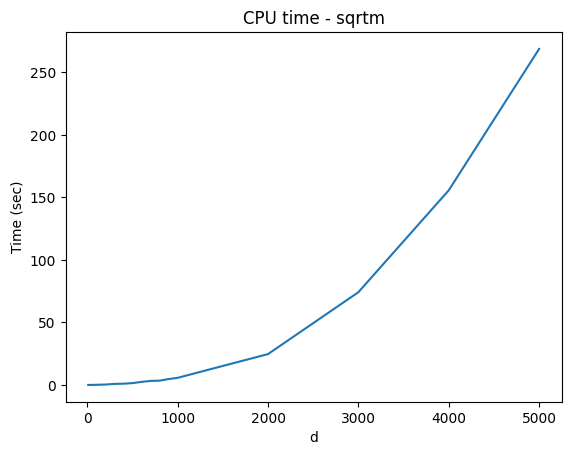

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import time

d_s = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000,4000, 5000]
times = []
for d in d_s:
    times_it = []
    for _ in range(10):
        X = np.random.randn(10, d)
        V = (X.T @ X) + (np.identity(d) * 0.1)
        t0 = time.process_time()
        sqrt = scipy.linalg.sqrtm(V)
        times_it.append(time.process_time()-t0)
    times.append(np.mean(times_it))


plt.plot(d_s, times)
plt.xlabel('d')
plt.ylabel('Time (sec)')
plt.title('CPU time - sqrtm')


In [8]:
import numpy as np

i = np.identity(1)
p = np.random.randn(3, 4)
i, p

(array([[1.]]),
 array([[-0.54097567, -0.48877576, -0.94097848,  0.7380959 ],
        [-1.18202439, -1.24372025, -1.79622719, -0.75809178],
        [-0.50525825, -0.57054877,  0.13973554,  0.47117411]]))

In [9]:
from scipy.linalg import block_diag

block_diag(i,p),block_diag(i,p).shape 

(array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        , -0.54097567, -0.48877576, -0.94097848,  0.7380959 ],
        [ 0.        , -1.18202439, -1.24372025, -1.79622719, -0.75809178],
        [ 0.        , -0.50525825, -0.57054877,  0.13973554,  0.47117411]]),
 (4, 5))

### Stockage in Bytes

In [62]:
actions=100
d=3000
m=10
k=50
fjlt = (8 * ((actions * (2*k)) + (2*k) + k**2))
print('FJLT: ', fjlt, 'Bytes')

cbscfd = (8 * ((m*d) + m**2 + 2*d))
print('CBSCFD: ', cbscfd, 'Bytes')

print('FJLT > CBSCFD: ', fjlt > cbscfd)

FJLT:  100800 Bytes
CBSCFD:  288800 Bytes
FJLT > CBSCFD:  False


### Rewards distribution

Positive rewards: 8


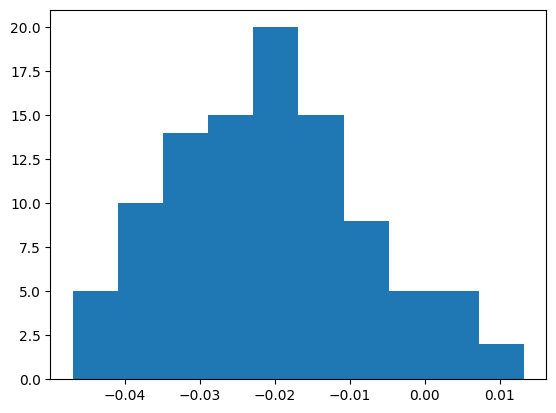

In [10]:
import numpy as np
import matplotlib.pyplot as plt

seed = 12
rng = np.random.RandomState(seed)
def generate_theta(d, rng):
    theta = rng.randn(d)
    theta /= np.linalg.norm(theta, 2)
    return theta
def generate_action_set(m, d, rng):
    action_set = rng.randn(m, d) + 1
    action_set /= np.linalg.norm(action_set, 2, axis=1)[:, None]
    return action_set

d=3000
m=100

theta = generate_theta(d, rng)
action_set = generate_action_set(m, d, rng)

plt.hist(action_set @ theta,)
print(f'Positive rewards: {sum(action_set @ theta>0)}')

In [2]:
import numpy as np

a = np.array([
[1,      1,      1,    0.5, np.nan, np.nan, np.nan],
[1,      1,      1, np.nan, np.nan, np.nan, np.nan],
[1,      1,      1,    0.5,   0.25,  0.125,  0.075],
[1,      1,      1,   0.25, np.nan, np.nan, np.nan],
[1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
[1,      1,    0.5,    0.5, np.nan, np.nan, np.nan]
])


array([[1, 2, 3, 4, 4, 4, 4],
       [1, 2, 3, 3, 3, 3, 3],
       [1, 2, 3, 4, 5, 6, 7],
       [1, 2, 3, 4, 4, 4, 4],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 2, 3, 4, 4, 4, 4]])

In [8]:
np.sum((~np.isnan(a)), axis=1)-1

array([3, 2, 6, 3, 0, 3])

In [17]:
import pandas as pd

d = {'LinREL':{'x':0, 'y':0}, 'CB':{'x':1, 'y':0},}
df = pd.DataFrame.from_dict(d, orient='index')
df['model'] = df.index
df.columns

Index(['x', 'y', 'model'], dtype='object')

In [1]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
np.random.seed(0)
X_dense = np.random.rand(100, 100)
X_dense[:, 2 * np.arange(50)] = 0
X = csr_matrix(X_dense)
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit_transform(X).shape
# print(svd.explained_variance_ratio_)
# print(svd.explained_variance_ratio_.sum())
# print(svd.singular_values_)

(100, 5)

In [41]:
n = 3000
eps = 1
p = 2
d =  3000
c1 = 5
P = None
q = min(1, (c1 * (eps**(p-2) ) * (np.log10(n)**p))/d)
q

0.0201506203667054

In [38]:
import scipy.sparse as sp

n = 30
eps = 1
p = 2
d =  5
c1 = 1
P = None
q = min(1, (c1 * (eps**(p-2) ) * (np.log10(n)**p))/d)
print(q)
k = 5
if q == 1:
    # skip index generation if totally dense
    P =  np.random.normal(0, np.sqrt(1 / q), size = (k, d))

else:
    # Generate location of non zero elements
    indices = []
    offset = 0
    indptr = [offset]
    for _ in range(k):
        # find the indices of the non-zero components for row i
        n_nonzero_i = np.random.binomial(d, q)
        indices_i = np.random.choice(d, n_nonzero_i, replace=False)
        indices.append(indices_i)
        offset += n_nonzero_i
        indptr.append(offset)
    print(indices)
    indices = np.concatenate(indices)
    print(indices)

    # Draw from normal distribution of mean 0 and var q⁻1
    print(np.size(indices), indices.shape)
    data = np.random.normal(0, np.sqrt(1 / q), size=np.size(indices))
    print(data.shape)

    # build the CSR structure by concatenating the rows
    components = sp.csr_matrix(
        (data, indices, indptr), shape=(k, d)
    )

    P = (components).toarray()
P

0.4363774402289179
[array([3, 0, 2]), array([2]), array([1, 0, 4, 2]), array([3, 1]), array([3, 4, 0, 2])]
[3 0 2 2 1 0 4 2 3 1 3 4 0 2]
14 (14,)
(14,)


array([[-1.95079891,  0.        , -1.29104661,  0.43021055,  0.        ],
       [ 0.        ,  0.        ,  1.63860425,  0.        ,  0.        ],
       [ 0.18894739,  1.65714222, -0.12825695,  0.        ,  0.73741505],
       [ 0.        , -0.2052985 ,  0.        , -0.9074925 ,  0.        ],
       [-0.33048393,  0.        ,  0.31144102,  2.31375125, -0.18677526]])

In [32]:
P = np.zeros((k, d))
probabilities = np.random.random((k, d))
n_samples = len(probabilities[probabilities <= q])
P[probabilities <= q] = np.random.normal(0, np.sqrt(1 / q), size = n_samples)
P

array([[ 0.        ,  0.        ,  0.55195847, -0.94236344,  0.        ],
       [-0.66139221,  0.        ,  1.74075814, -1.22021301,  0.7508346 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.14996856, -0.45970102,  0.30139199,  0.74089876],
       [-0.89229556,  1.23194388,  0.        ,  0.        ,  0.        ]])

In [10]:
import numpy as np
d = 5
diag = np.random.choice([-1, 1], p=[0.5, 0.5], size=d)
D = np.diag(diag)
D

array([[ 1,  0,  0,  0,  0],
       [ 0, -1,  0,  0,  0],
       [ 0,  0,  1,  0,  0],
       [ 0,  0,  0, -1,  0],
       [ 0,  0,  0,  0,  1]])

In [11]:
H = np.random.randn(d, d)
H

array([[ 2.10695542, -1.56549967, -1.5256256 , -1.25139208,  0.24167997],
       [ 0.52162423, -0.88300273, -0.6619922 , -1.12960371, -0.73715075],
       [ 1.67174455,  0.52109014, -0.93951383,  0.495699  , -0.69448001],
       [ 0.355042  ,  1.05071474, -0.72742885, -0.3923006 , -0.27698747],
       [ 0.03856578,  0.3858428 , -0.33702465,  0.6068946 , -0.21870612]])

In [12]:
H @ D

array([[ 2.10695542,  1.56549967, -1.5256256 ,  1.25139208,  0.24167997],
       [ 0.52162423,  0.88300273, -0.6619922 ,  1.12960371, -0.73715075],
       [ 1.67174455, -0.52109014, -0.93951383, -0.495699  , -0.69448001],
       [ 0.355042  , -1.05071474, -0.72742885,  0.3923006 , -0.27698747],
       [ 0.03856578, -0.3858428 , -0.33702465, -0.6068946 , -0.21870612]])

In [14]:
H * diag

array([[ 2.10695542,  1.56549967, -1.5256256 ,  1.25139208,  0.24167997],
       [ 0.52162423,  0.88300273, -0.6619922 ,  1.12960371, -0.73715075],
       [ 1.67174455, -0.52109014, -0.93951383, -0.495699  , -0.69448001],
       [ 0.355042  , -1.05071474, -0.72742885,  0.3923006 , -0.27698747],
       [ 0.03856578, -0.3858428 , -0.33702465, -0.6068946 , -0.21870612]])

In [31]:
import numpy as np
m = 10
d = 3000
Z = np.random.randn(2*m, d)

In [32]:
alpha=0.1
U, S, Vt = np.linalg.svd(Z, full_matrices=False)
delta = S[m-1]**2
# Add this value to alpha
alpha += delta
# Compute ̂Σ = √ (Σ² - δI) (remove empty rows (0 value rows))
S, Vt = S[:m-1], Vt[:m-1, :]
diff = np.diag(S**2 - delta) 
S_hat =  np.sqrt(diff)
# Compute Z
Z_new_1 = (S_hat @ Vt)
Z_new_1

array([[-0.04760708, -0.26843845, -0.23856439, ..., -0.26832272,
        -0.0312922 ,  0.16688416],
       [ 0.06600936, -0.17981478, -0.1823441 , ..., -0.0306142 ,
        -0.27955009,  0.07267722],
       [ 0.50448177,  0.42852827, -0.18889725, ..., -0.0754492 ,
        -0.31903144, -0.13010278],
       ...,
       [ 0.44322595,  0.41212079, -0.31426023, ...,  0.0399892 ,
        -0.30212222, -0.07416323],
       [ 0.20145168,  0.20116141, -0.04863898, ...,  0.03050237,
        -0.02027622, -0.0794535 ],
       [ 0.10692406, -0.19812716, -0.14993555, ...,  0.1468529 ,
        -0.02055462,  0.16492724]])

In [33]:
alpha=0.1
U, S, Vt = np.linalg.svd(Z, full_matrices=False)
delta = S[m-1]**2
# Add this value to alpha
alpha += delta
# Compute ̂Σ = √ (Σ² - δI) (remove empty rows (0 value rows))
diff = np.diag(S**2 - delta) 
diff[diff<0] = 0
S_hat =  np.sqrt(diff)
# Compute Z
Z_new_2 = (S_hat @ Vt)[:m-1]
Z_new_2

array([[-0.04760708, -0.26843845, -0.23856439, ..., -0.26832272,
        -0.0312922 ,  0.16688416],
       [ 0.06600936, -0.17981478, -0.1823441 , ..., -0.0306142 ,
        -0.27955009,  0.07267722],
       [ 0.50448177,  0.42852827, -0.18889725, ..., -0.0754492 ,
        -0.31903144, -0.13010278],
       ...,
       [ 0.44322595,  0.41212079, -0.31426023, ...,  0.0399892 ,
        -0.30212222, -0.07416323],
       [ 0.20145168,  0.20116141, -0.04863898, ...,  0.03050237,
        -0.02027622, -0.0794535 ],
       [ 0.10692406, -0.19812716, -0.14993555, ...,  0.1468529 ,
        -0.02055462,  0.16492724]])

In [35]:
np.sum(Z_new_1-Z_new_2)

0.0

In [33]:
u[:, :4] @ np.diag(s[:4]) @ vt[:4, :]

array([[ 0.6929556 , -1.22663214, -0.15937112, -0.86985546,  1.06733843,
        -1.10476023, -0.11030366,  0.19398492, -0.00368626,  0.2674506 ],
       [ 0.02041191, -0.34322014, -0.17054399, -0.37053085, -2.28151968,
         0.39743122,  0.51839199,  0.56779797, -0.41243286,  0.01392036],
       [ 1.48486084,  1.76594153,  0.36783419,  0.57709733,  0.90758189,
         0.62130184, -0.61799852, -0.81943538, -0.3841727 , -1.2986693 ],
       [ 0.08556053,  0.67511959,  0.59953224, -0.64253128, -2.68621938,
         0.52995913,  0.62111151, -0.07337686, -0.48432589, -0.84995713],
       [-0.29421687, -0.23576961, -1.12511846,  1.55943602,  1.16532433,
         0.66012706, -0.50885563,  0.54869508,  0.21941796,  1.02394178],
       [-2.21388867,  0.72397248,  1.73264759, -0.65007227,  2.39669259,
        -1.33747103,  0.09058845, -1.58633155,  1.29018517, -0.23057471],
       [ 1.14085931, -0.62190996, -0.19576752, -0.27026887,  2.59628188,
        -0.99922082, -0.63099575, -0.19168112

In [34]:
np.linalg.matrix_rank(Z)

10

In [104]:
import numpy as np
from scipy.linalg import hadamard

import time
actions = 1000
d=5
k=3
c1=1
seed = 48
rng = np.random.RandomState(seed)
action_set = rng.randn(actions, d)


In [105]:
## Generate P
q = min(1, (c1 * (np.log10(actions)))/d)
P = np.zeros((k, d))
probabilities = rng.random((k, d))
n_samples = len(probabilities[probabilities <= q])
P[probabilities <= q] = rng.normal(0, np.sqrt(1 / q), size = n_samples)

## Generate H
# In case the original dim is not a power 2 
power = np.log2(d)
next_dim_power_2 = d if power == int(power) else 2**(int(power)+1)
H = hadamard(next_dim_power_2)[:d,:d] * (1./np.sqrt(d))

## Generate D
diag = rng.choice([-1, 1], p=[0.5, 0.5], size=d)

phi = (1 /np.sqrt(k)) * P @ (H * diag)

In [92]:
# In case the original dim is not a power 2 
power = np.log2(d)
next_dim_power_2 = d if power == int(power) else 2**(int(power)+1)
## Generate P
q = min(1, (c1 * (np.log10(actions)))/d)
P_new= np.zeros((k, next_dim_power_2))
probabilities = rng.random((k, next_dim_power_2))
n_samples = len(probabilities[probabilities <= q])
P_new[probabilities <= q] = rng.normal(0, np.sqrt(1 / q), size = n_samples)
P_new[:k, :d] = P

## Generate H
H_new = hadamard(next_dim_power_2) * (1./np.sqrt(d))

## Generate D
diag_new = rng.choice([-1, 1], p=[0.5, 0.5], size=next_dim_power_2)
diag_new[:d] = diag

phi_new = (1 /np.sqrt(k)) * P_new @ (H_new * diag_new)

In [106]:

c1=1
c=6
p=2
eps=1
n=actions
original_dim = d
power = np.log2(original_dim)
dim = original_dim if power == int(power) else 2**(int(power)+1)
actions = action_set.shape[0] 

# Generate P
q = min(1, (c1 * (eps**(p-2) ) * (np.log10(n)**p))/d)

P = np.zeros((k, dim))
probabilities = rng.random((k, dim))
n_samples = len(probabilities[probabilities <= q])
P[probabilities <= q] = rng.normal(0, np.sqrt(1 / q), size = n_samples)

H = hadamard(dim) * (1./np.sqrt(dim))
D = np.diag(rng.choice([-1, 1], p=[0.5, 0.5], size=dim))

phi = (1 /np.sqrt(k)) * P @ H @ D
# action_set_new = np.zeros(dim)
action_set_new = np.zeros((action_set.shape[0], dim))
action_set_new[:action_set.shape[0], :action_set.shape[1]] = action_set
action_set_new @ phi.T


array([[-1.4967482 ,  0.17763896, -0.6159898 ],
       [-0.37411745, -0.96290456, -1.70229578],
       [ 0.59427569,  1.61397853,  0.38609433],
       ...,
       [ 1.37037765, -1.29121021, -1.02819729],
       [ 0.60907315,  0.27022248,  0.22126501],
       [ 2.43030426, -0.42604783, -0.67752821]])

In [107]:
a = np.random.randn(d)
action_set_new = np.zeros(dim)
action_set_new[:d] = a
phi @ action_set_new

array([1.24644831, 0.90604513, 1.01579321])

In [110]:
phi @ a

array([ 1.26436054,  0.60772933, -0.09547445])

In [109]:
P = P[:, :d]
H = H[:d, :d]
D = D[:d, :d]

phi = (1 /np.sqrt(k)) * P @ H @ D
action_set @ phi.T


array([[-1.47732889,  0.27723487, -0.52423594],
       [-0.18360589, -0.74353189, -0.40608477],
       [ 1.04627143,  1.00012483, -0.22482783],
       ...,
       [ 1.18041536, -1.11176972,  0.25212653],
       [ 0.7665298 ,  0.0688107 ,  0.25404739],
       [ 1.90761691, -0.32216602, -0.97150563]])

In [92]:
t0 = time.process_time()
times = []
for _ in range(1000):
    action_set_proj = (1 /np.sqrt(k)) *( P @ ((H * diag) @ (action_set).T))
    times.append(time.process_time() - t0)
print (np.mean(times))

0.26832256792999953


In [91]:
t0 = time.process_time()
times = []
for _ in range(1000):
    action_set_proj_phi = action_set @ phi.T
    times.append(time.process_time() - t0)
print (np.mean(times))


0.0025376856160004044


In [41]:
import numpy as np
from sklearn.random_projection import sample_without_replacement
import scipy.sparse as sp
rng = np.random.RandomState(48)

In [48]:
P @ np.identity(P.shape[1])

array([[-0.26061281,  0.        , -1.52198063,  0.        ,  0.        ,
        -0.17960961,  0.        ,  0.        ],
       [ 0.        , -0.79099822, -0.28433449, -0.4391394 , -0.92167053,
         0.        ,  0.        , -0.39182149]])

In [46]:
P

array([[ 0.        ,  0.        ,  1.34439206,  0.        ,  0.        ,
        -0.62937513,  0.        ,  0.18642346],
       [-0.39770503,  0.        ,  0.        ,  0.        ,  0.84652054,
        -1.11592472,  0.        ,  1.78043341]])

In [48]:
import numpy as np
from scipy.linalg import hadamard

def generate_phi(d, n, c=0.001, k=None, eps=0.1, p=2, c1=1, rng=None):
    """
        Generate FJLT matrix
            source: https://www.cs.princeton.edu/~chazelle/pubs/FJLT-sicomp09.pdf
        n: number of points
        d: dimension
        k: projected dimension
        c: constant used in matrix embedding generation
        eps: distortion parameter in FJLT
        p: kind of embedding we project to

    """
    if k is None:
        k = math.ceil(c * eps**(-2) * np.log10(n))
    # In case the original dim is not a power 2 
    power = np.log2(d)
    next_dim_power_2 = d if power == int(power) else 2**(int(power)+1)

    ## Generate P
    q = min(1, (c1 * (eps**(p-2) ) * (np.log10(n)**p))/next_dim_power_2)
    P = np.zeros((k, next_dim_power_2))
    probabilities = rng.random((k, next_dim_power_2))
    n_samples = len(probabilities[probabilities <= q])
    P[probabilities <= q] = rng.normal(0, np.sqrt(1 / q), size = n_samples)

    ## Generate H
    H = hadamard(next_dim_power_2) * (1./np.sqrt(next_dim_power_2))

    ## Generate D
    diag = rng.choice([-1, 1], p=[0.5, 0.5], size=next_dim_power_2)

    phi = (1 /np.sqrt(k)) * P @ (H * diag)
    ### Test
    H = H[:, :d]
    diag = diag[:d]
    phi_d = (1 /np.sqrt(k)) * P @ (H * diag)


    return phi, phi_d


In [49]:
m = 10000
d = 10000
k = 100
rng = np.random.RandomState(48)
action_set = rng.randn(m, d)
# In case the original dim is not a power 2 
power = np.log2(d)
next_dim_power_2 = d if power == int(power) else 2**(int(power)+1)
action_set_pad0 = np.zeros((m, next_dim_power_2))
action_set_pad0[:, :d] = action_set

In [51]:
phi, phi_d = generate_phi(d, m, k=k, rng=rng)

In [52]:
a = action_set_pad0 @ phi.T
b = action_set @ phi_d.T

In [53]:
np.sum(a-b)

3.7902363539399353e-13

In [46]:
a

array([[ -0.66162654,   2.79870645,  -6.02525729, ...,   0.53103741,
         -9.77680388,  -5.37455944],
       [  6.26574715,  -3.27091026,   3.20487192, ...,  -5.16063651,
          8.01070632,  -1.66089298],
       [ 13.39073912,  -2.13637544,   0.03076496, ..., -11.75936279,
          3.00839807,   2.51596159],
       ...,
       [ -3.59244904,   3.75899413,   2.59847238, ...,  -5.83857269,
        -17.42538875,  -7.28868103],
       [  1.57758726,  -3.89275093,   2.18810189, ...,  -7.68594921,
         -2.89955566,  -5.08082428],
       [ -0.09662227,   7.85167437,  -1.17468676, ...,   1.93261079,
          5.03716435,  -7.66130657]])

In [47]:
b

array([[ -0.66162654,   2.79870645,  -6.02525729, ...,   0.53103741,
         -9.77680388,  -5.37455944],
       [  6.26574715,  -3.27091026,   3.20487192, ...,  -5.16063651,
          8.01070632,  -1.66089298],
       [ 13.39073912,  -2.13637544,   0.03076496, ..., -11.75936279,
          3.00839807,   2.51596159],
       ...,
       [ -3.59244904,   3.75899413,   2.59847238, ...,  -5.83857269,
        -17.42538875,  -7.28868103],
       [  1.57758726,  -3.89275093,   2.18810189, ...,  -7.68594921,
         -2.89955566,  -5.08082428],
       [ -0.09662227,   7.85167437,  -1.17468676, ...,   1.93261079,
          5.03716435,  -7.66130657]])